In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
folder_base = '/Users/emiliebertholet/cernbox/coldbox_data'

In [3]:
!ls /Users/emiliebertholet/cernbox/coldbox_data

adc_data_run_25036_ch_40_all.npy adc_data_run_25068_ch_37_all.npy
adc_data_run_25050_ch_37_all.npy adc_data_run_25071_ch_37_all.npy
adc_data_run_25066_ch_40_all.npy adc_data_run_25087_ch_37_all.npy


In [4]:
filename = f'{folder_base}/adc_data_run_25036_ch_40_all.npy' # neutrons
# (16600, 65536): 16600 = "rows"; 65536 = "columns"
# filename = f'{folder_base}/adc_data_run_25066_ch_40_all.npy' # cosmcis #(4200, 262144)
data = np.load(filename, allow_pickle=True).astype(np.int16)
data.shape


(16600, 65536)

In [5]:
def fast_plot(data):
    fig, axs = plt.subplots(1, 1, figsize=(12, 2))
    axs.plot(data.transpose())
    axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

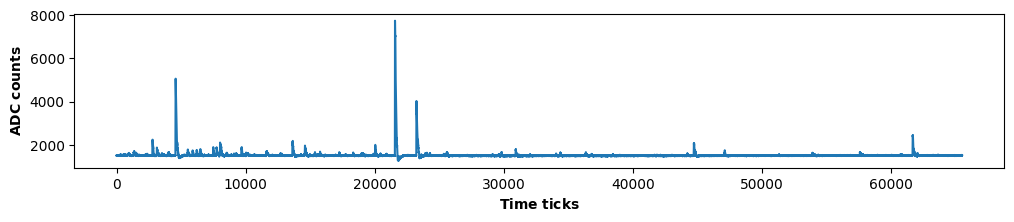

In [6]:
fast_plot(data[0])

In [14]:
data.flatten().shape

(1087897600,)

(1000.0, 2000.0)

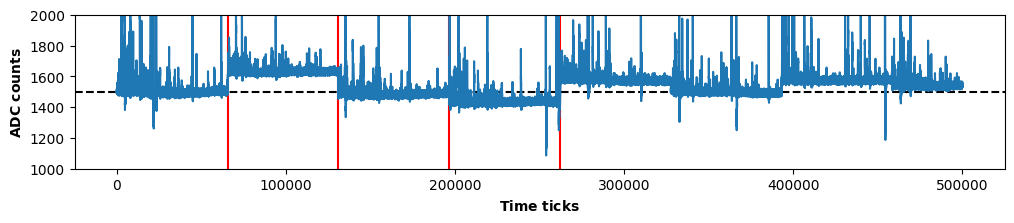

In [29]:
# l, r = 0, 10000 
out = data.flatten()[int(0e6):int(0.5e6)]

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
# 65536
ax.axvline(x = 65536, color = 'r')
ax.axvline(x = 2*65536, color = 'r')
ax.axvline(x = 3*65536, color = 'r')
ax.axvline(x = 4*65536, color = 'r')
ax.axhline(y = 1500, color = 'black', linestyle='--')
ax.plot(out.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_ylim(1000, 2000)

In [ ]:
int(1e6)

1000000.0

## Pedestal Subtraction



In [ ]:
# def substract_peds(row):
#     return row - np.argmax(np.bincount(row))